<a href="https://colab.research.google.com/github/ulrikSebastienR/2021-Coding-Basic/blob/main/ecg_basics_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Understand ecg signal https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
# finding peaks of ecg https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html?highlight=ecg
# find prominence of a peak https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_prominences.html
# find width of a peak https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html#scipy.signal.peak_widths
from scipy.misc import electrocardiogram
print(type(electrocardiogram), electrocardiogram)

<class 'function'> <function electrocardiogram at 0x7f74720b24d0>


In [36]:
electrocardiogram()

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [37]:
ecg = electrocardiogram()
print(type(ecg), ecg.shape, ecg.size, ecg.mean(), ecg.std(), '\n', ecg)

<class 'numpy.ndarray'> (108000,) 108000 -0.16510875 0.5992473991177294 
 [-0.245 -0.215 -0.185 ... -0.405 -0.395 -0.385]


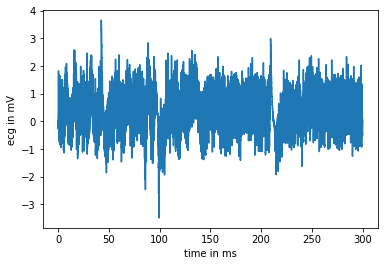

In [38]:
import matplotlib.pyplot as plt
import numpy as np

fs = 360 # Why 360
time = np.arange(ecg.size)/fs
plt.plot(time, ecg)
plt.xlabel('time in ms')
plt.ylabel('ecg in mV')
plt.show()

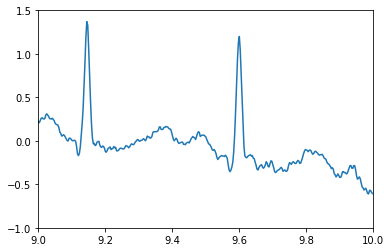

In [39]:
# but this signal does not show us anything and we need to zoom into one arbitrary section of it. 
plt.plot(time, ecg)
plt.xlim(9,10)
plt.ylim(-1,1.5)
plt.show()
#As stated the signal features several areas with a different morphology. 
#E.g., the first few seconds show the electrical activity of a heart in normal sinus rhythm as seen below.

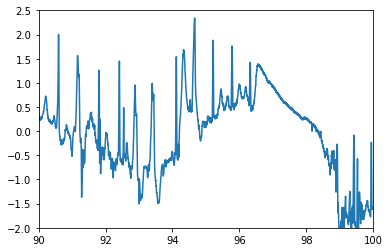

In [40]:
plt.plot(time, ecg)
plt.xlim(90,100)
plt.ylim(-2,2.5)
plt.show()

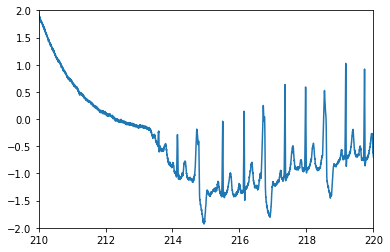

In [41]:
# Here between 210 and 212, noise signal is taking completely over ecg signal.
plt.plot(time,ecg)
plt.xlim(210,220)
plt.ylim(-2,2)
plt.show()

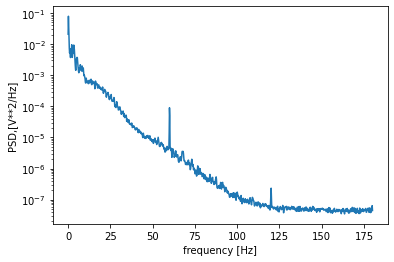

In [42]:
# analyze the power spectral density
from scipy.signal import welch # welch method computes the power spectral density of the signal.
f,pxx = welch(ecg, fs=fs,nperseg=2048,scaling='spectrum')
plt.semilogy(f,pxx) #
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD,[V**2/Hz]')
plt.show()

In [43]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html?highlight=ecg
from scipy.signal import find_peaks

In [44]:
x = electrocardiogram()[2000:4000]
print(x, type(x), len(x), x.shape, x.size)

[-0.9   -0.895 -0.895 ... -0.67  -0.65  -0.615] <class 'numpy.ndarray'> 2000 (2000,) 2000


In [45]:
peaks = find_peaks(x)
print(peaks) # reason why we shall do peaks, _ to separate peaks

(array([   1,    8,   14,   21,   24,   31,   37,   46,   65,   80,   84,
         92,   97,  104,  109,  115,  120,  128,  134,  141,  146,  153,
        162,  168,  176,  181,  195,  199,  206,  211,  217,  225,  229,
        236,  251,  259,  265,  271,  278,  284,  289,  295,  308,  314,
        325,  331,  336,  353,  355,  362,  368,  374,  380,  386,  391,
        397,  410,  416,  431,  442,  445,  452,  458,  464,  471,  475,
        481,  489,  494,  496,  500,  507,  512,  520,  524,  529,  535,
        541,  554,  560,  566,  571,  578,  584,  590,  595,  608,  620,
        625,  631,  637,  643,  651,  656,  661,  668,  675,  686,  692,
        703,  709,  717,  722,  729,  731,  733,  738,  747,  758,  763,
        779,  788,  793,  799,  808,  811,  813,  818,  825,  836,  849,
        856,  860,  863,  867,  871,  882,  888,  895,  908,  914,  927,
        938,  956,  967,  973,  980,  987,  992,  998, 1005, 1009, 1016,
       1022, 1029, 1034, 1040, 1044, 1051, 1064, 1

In [46]:
peaks, _ = find_peaks(x)
print(peaks)
print(_)

[   1    8   14   21   24   31   37   46   65   80   84   92   97  104
  109  115  120  128  134  141  146  153  162  168  176  181  195  199
  206  211  217  225  229  236  251  259  265  271  278  284  289  295
  308  314  325  331  336  353  355  362  368  374  380  386  391  397
  410  416  431  442  445  452  458  464  471  475  481  489  494  496
  500  507  512  520  524  529  535  541  554  560  566  571  578  584
  590  595  608  620  625  631  637  643  651  656  661  668  675  686
  692  703  709  717  722  729  731  733  738  747  758  763  779  788
  793  799  808  811  813  818  825  836  849  856  860  863  867  871
  882  888  895  908  914  927  938  956  967  973  980  987  992  998
 1005 1009 1016 1022 1029 1034 1040 1044 1051 1064 1070 1077 1082 1094
 1099 1105 1111 1125 1136 1144 1147 1154 1161 1167 1171 1179 1186 1188
 1190 1201 1206 1210 1220 1236 1244 1249 1255 1267 1273 1278 1292 1300
 1305 1309 1317 1321 1323 1328 1334 1340 1347 1353 1357 1370 1377 1388
 1394 

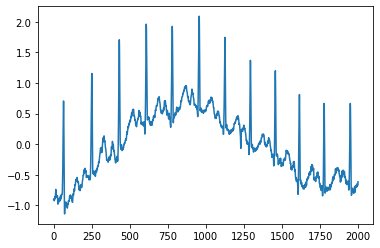

In [47]:
plt.plot(x)
plt.show()

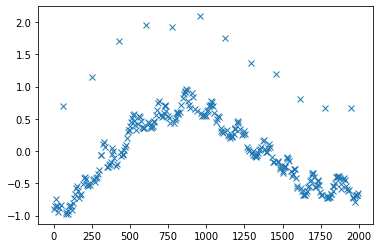

In [48]:
plt.plot(peaks,x[peaks], 'x')
plt.show()

In [49]:
# find prominence of a peak https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_prominences.html
# find width of a peak https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html#scipy.signal.peak_widths
from scipy.signal import peak_prominences, peak_widths

In [50]:
prominences = peak_prominences(ecg, peaks,2) # have randomly taken a window length of 2
print(type(prominences), prominences, prominences)

<class 'tuple'> (array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.005, 0.   , 0.025, 0.005, 0.005, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.01 , 0.   , 0.   , 0.02 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   ,
       0.   , 0.   , 0.01 , 0.   , 0.   , 0.005, 0.   , 0.   , 0.   ,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PeakPropertyWarning: some peaks have a prominence of 0
  """Entry point for launching an IPython kernel.


In [51]:
print(type(prominences[0]),  prominences[0].size, prominences[0])

<class 'numpy.ndarray'> 288 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.005
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.01  0.    0.    0.    0.    0.    0.
 0.    0.    0.005 0.    0.025 0.005 0.005 0.    0.    0.    0.    0.
 0.01  0.    0.    0.02  0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.01  0.    0.    0.    0.    0.01  0.    0.    0.005 0.    0.    0.
 0.005 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.005 0.    0.    0.    0.    0.03  0.    0.    0.    0.
 0.01  0.    0.    0.    0.    0.    0.    0.01  0.    0.    0.01  0.
 0.    0.    0.    0.    0.    0.    0.005 0.005 0.    0.  

In [52]:
print(type(prominences[1]),  prominences[1].size, prominences[1])

<class 'numpy.ndarray'> 288 [   0    7   13   21   24   30   37   46   65   80   84   91   96  104
  108  115  119  128  133  141  146  152  162  168  175  180  194  198
  205  210  217  225  229  235  251  259  264  271  277  283  288  294
  307  313  325  331  335  352  354  361  368  373  380  385  390  396
  409  415  431  442  445  451  458  464  470  475  480  488  493  496
  499  507  512  519  524  529  534  540  554  560  566  571  578  583
  589  594  607  619  624  630  636  643  651  656  660  668  674  685
  691  702  709  716  721  728  730  733  738  746  757  763  779  787
  792  798  807  811  812  817  824  836  849  856  859  863  867  871
  882  888  895  907  914  927  937  955  966  973  979  986  992  997
 1005 1009 1015 1021 1028 1034 1040 1044 1051 1064 1069 1076 1082 1094
 1098 1105 1110 1124 1136 1144 1146 1153 1160 1166 1171 1178 1185 1188
 1189 1200 1205 1210 1220 1235 1243 1249 1254 1267 1273 1278 1291 1300
 1305 1308 1316 1321 1323 1327 1333 1339 1346 135

In [53]:
print(type(prominences[2]),  prominences[2].size, prominences[2])

<class 'numpy.ndarray'> 288 [   1    8   14   22   24   31   37   47   65   81   84   93   97  104
  109  115  120  129  134  142  146  153  163  168  176  181  195  199
  206  212  217  226  230  236  251  259  265  272  279  284  290  296
  309  314  325  331  336  353  356  362  368  375  381  386  391  397
  410  416  432  443  446  452  459  465  471  476  481  489  494  497
  500  508  513  520  524  530  535  541  555  561  567  572  578  584
  590  595  608  620  625  631  637  644  652  657  661  668  676  686
  692  703  710  718  722  729  732  733  738  747  759  763  780  788
  793  799  808  811  813  818  825  837  850  857  860  864  867  871
  882  888  895  908  914  928  938  956  968  974  980  987  992  999
 1005 1009 1016 1022 1030 1035 1040 1045 1052 1064 1070 1078 1082 1094
 1100 1105 1111 1125 1137 1145 1147 1154 1162 1168 1171 1179 1187 1188
 1190 1201 1206 1211 1221 1236 1244 1249 1255 1268 1273 1279 1292 1301
 1305 1309 1318 1322 1324 1328 1334 1340 1347 135

In [54]:
prominences = peak_prominences(ecg, peaks,3) # have randomly taken a window length of 2, wlen must be larger than 1.
print(type(prominences), prominences)

<class 'tuple'> (array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.005, 0.   , 0.025, 0.005, 0.005, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.01 , 0.   , 0.   , 0.02 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   ,
       0.   , 0.   , 0.01 , 0.   , 0.   , 0.005, 0.   , 0.   , 0.   ,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PeakPropertyWarning: some peaks have a prominence of 0
  """Entry point for launching an IPython kernel.


In [60]:
peak_width = peak_widths(ecg, peaks, rel_height=0.5)

TypeError: ignored